In [1]:
%load_ext autoreload
%autoreload 2
%cd ..
import numpy as np
import matplotlib.pyplot as plt
from src.ortools_solver import CVRP_solver
from src.utils import random_choose_candidate_2
from src.pipette_scheduler import calculate_D, calculate_S_E, calculate_D_prime,calculate_T_test
import pandas as pd

/home/yq-mew/yq/chem1906/Projects/pipette_scheduling


/u/yq/chem1906/anaconda3/envs/pipette_scheduling/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
np.random.seed(0)
num_candidates = 2000
a = random_choose_candidate_2(96,96,num_candidates)
D_S = calculate_D(a.shape[0])
D_D = calculate_D(a.shape[1])
S, E, volumes = calculate_S_E(a)
# calculate distance matrix
D_prime = calculate_D_prime(D_S, D_D, S, E, volumes, 1, 100, 1, 100)
# VRP solver
VRP_distance, VRP_recorder = CVRP_solver((D_prime * 100).astype(np.int64), solving_time=20)


VRP distance:  324108


In [16]:
stats = []
for r in range(1):
    num_candidates = 400
    a = random_choose_candidate_2(96,96,num_candidates)
    D_S = calculate_D(a.shape[0])
    D_D = calculate_D(a.shape[1])
    S, E, volumes = calculate_S_E(a)
    # calculate distance matrix
    D_prime = calculate_D_prime(D_S, D_D, S, E, volumes, 1, 100, 1, 100)

    for i in range(2,50):
        # VRP solver
        VRP_distance, VRP_recorder = CVRP_solver(np.round(D_prime*100).astype(np.int64), solving_time=i)
        VRP_distance = VRP_distance / 100
        print(f'VRP_distance: {VRP_distance}')
        stats.append([r,i, VRP_distance])

VRP_distance: 753.9
VRP_distance: 753.9
VRP_distance: 748.6
VRP_distance: 738.69
VRP_distance: 729.65
VRP_distance: 729.65
VRP_distance: 729.36
VRP_distance: 728.14
VRP_distance: 727.67
VRP_distance: 727.67
VRP_distance: 727.67
VRP_distance: 727.67
VRP_distance: 726.66
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 726.24
VRP_distance: 725.22
VRP_distance: 725.15
VRP_distance: 725.15
VRP_distance: 725.15
VRP_distance: 725.15
VRP_distance: 725.15
VRP_distance: 725.13
VRP_distance: 725.13
VRP_distance: 725.13
VRP_distance: 725.13
VRP_distance: 725.13
VRP_distance: 724.52
VRP_distance: 724.47
VRP_distance: 72

In [17]:
stats_df = pd.DataFrame(stats, columns=['repeats','time','VRP_distance'])
stats_df.to_csv('/u/yq/chem1906/Projects/pipette_scheduling/results/VRP_distance_wall_time.csv', index=False)

(array([720., 725., 730., 735., 740., 745., 750., 755., 760.]),
 [Text(0, 720.0, '720'),
  Text(0, 725.0, '725'),
  Text(0, 730.0, '730'),
  Text(0, 735.0, '735'),
  Text(0, 740.0, '740'),
  Text(0, 745.0, '745'),
  Text(0, 750.0, '750'),
  Text(0, 755.0, '755'),
  Text(0, 760.0, '760')])

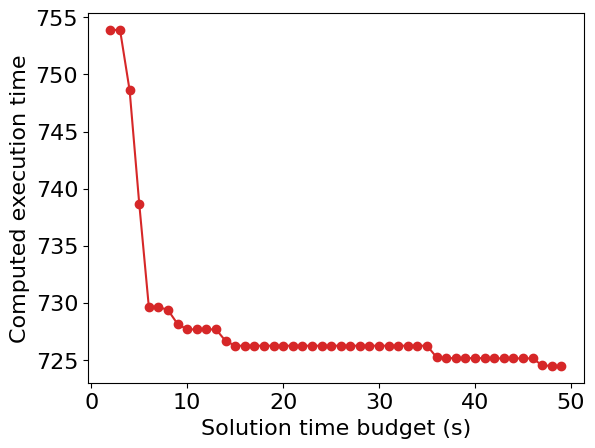

In [18]:

stats_df = pd.read_csv('/u/yq/chem1906/Projects/pipette_scheduling/results/VRP_distance_wall_time.csv')# group by time and calculate the mean and standard deviation
stats_df_grouped = stats_df.groupby('time').agg({'VRP_distance': ['mean', 'std']}).reset_index()
# plot the results
plt.errorbar(stats_df_grouped['time'], stats_df_grouped[('VRP_distance', 'mean')], yerr=stats_df_grouped[('VRP_distance', 'std')], fmt='o-', capsize=5, color='#d62728')
plt.xlabel('Solution time budget (s)', fontsize=16)
#plt.title('Number of jobs = 2000', fontsize=16)
plt.ylabel('Computed execution time', fontsize=16)
# tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [26]:
#save the df
stats_df.to_csv('VRP_distance_wall_time.csv', index=False)

In [8]:
stat = []
for num_candidate in num_candidates:
    a = random_choose_candidate_2(96,96,num_candidate)
    a[a>0] = 1
    jobs = np.argwhere(a)
    D_S = calculate_D(a.shape[0])
    D_D = calculate_D(a.shape[1])
    S, E = calculate_S_E(a)   
    # calculate distance matrix
    D_prime = calculate_D_prime(D_S,D_D, S, E)
    D_prime = add_depot(D_prime)

    for i in range(10,30):
        # VRP solver
        VRP_distance, VRP_recorder = CVRP_solver(D_prime.astype(np.int64), solving_time =i)
        print(f'VRP_distance: {VRP_distance}')
        stat.append([num_candidate,i,VRP_distance])

VRP_distance: 1666
VRP_distance: 1648
VRP_distance: 1642
VRP_distance: 1635
VRP_distance: 1635
VRP_distance: 1633
VRP_distance: 1631
VRP_distance: 1626
VRP_distance: 1626
VRP_distance: 1626
VRP_distance: 1626
VRP_distance: 1621
VRP_distance: 1621
VRP_distance: 1621
VRP_distance: 1621
VRP_distance: 1621
VRP_distance: 1621
VRP_distance: 1619
VRP_distance: 1618
VRP_distance: 1618
VRP_distance: 3440
VRP_distance: 3430
VRP_distance: 3426
VRP_distance: 3423
VRP_distance: 3419
VRP_distance: 3417
VRP_distance: 3417
VRP_distance: 3414
VRP_distance: 3414
VRP_distance: 3411
VRP_distance: 3406
VRP_distance: 3405
VRP_distance: 3402
VRP_distance: 3399
VRP_distance: 3396
VRP_distance: 3384
VRP_distance: 3376
VRP_distance: 3353
VRP_distance: 3352
VRP_distance: 3341
VRP_distance: 4964
VRP_distance: 4954
VRP_distance: 4944
VRP_distance: 4943
VRP_distance: 4938
VRP_distance: 4934
VRP_distance: 4932
VRP_distance: 4932
VRP_distance: 4928
VRP_distance: 4925
VRP_distance: 4925
VRP_distance: 4925
VRP_distance

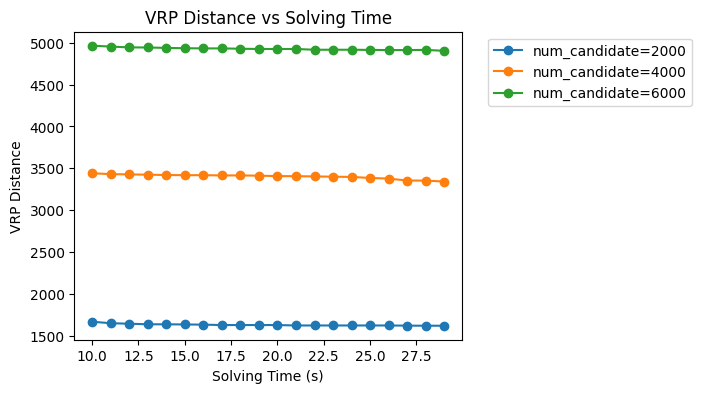

In [9]:
# plot the results as connected dots
df = pd.DataFrame(stat, columns=['num_candidate', 'solving_time', 'VRP_distance'])
df['num_candidate'] = df['num_candidate'].astype(int)
df['solving_time'] = df['solving_time'].astype(int)
df['VRP_distance'] = df['VRP_distance'].astype(int)
plt.figure(figsize=(5, 4))
for num_candidate in num_candidates:
    subset = df[df['num_candidate'] == num_candidate]
    plt.plot(subset['solving_time'], subset['VRP_distance'], marker='o', label=f'num_candidate={num_candidate}')
plt.xlabel('Solving Time (s)')
plt.ylabel('VRP Distance')
plt.title('VRP Distance vs Solving Time')
# move the legend on the right outside the plot
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()